In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv', index_col='file')

# print(df.head())
# df.plot()
# df = df[~df.index.isin(['vmlinux.bc', 'php.bc', 'git.bc'])]
df = df[df.index.isin(['vmlinux.bc', 'php.bc', 'git.bc', 'postgres.bc'])]
df

,ptagpu total,ptagpu analysis,svf init,cuda init + dealloc,update_pts kernel,main kernel,thrust sort,store kernel,async gep+ind,svf geps,...,bitcode filesize MB,wavediff total,wazediff analysis,naive ander,speedup,diff,num nodes,num edges,ptagpu time scientific,wavediff scientific
file,,,,,,,,,,,,,,,,,,,,,
git.bc,4690000.0,4680000.0,2190.25,17095.315,70148.000,3.968158e+06,11743.372,6.837329e+04,538454.710,498296.0,...,25.0,5.579539e+05,5.444653e+05,3.340449e+07,0.118966721535181,-4.13E+06,869,379,4690,557.953924
php.bc,65000000.0,64900000.0,2809.67,20928.407,193679.543,5.378310e+07,12298.489,1.073274e+07,187398.213,467306.0,...,52.0,6.456972e+05,6.194277e+05,6.530636e+06,0.00993909334815148,-6.43E+07,1582,611,#VALUE!,645.697175
postgres.bc,465527.0,440058.0,2911.59,8824.470,65379.251,1.929896e+05,1374.555,3.201948e+04,135372.093,132753.0,...,18.0,9.973557e+05,9.685452e+05,6.481597e+06,2.14242292713419,5.32E+05,1432,721,465.527,997.355718
vmlinux.bc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.0,3.210057e+07,3.201723e+07,NaN,#VALUE!,#VALUE!,4464,2206,#VALUE!,32100.566652


In [2]:
df['speedup'] = df['wavediff total']/df['ptagpu total']

# df[df.columns[0]]
# df['speedup'] = df[df.columns[0]] / df.columns[-2]
df['speedup']

file
bash.bc            1.047331
bison.bc           1.929172
diff.bc            0.347165
htop.bc            0.552116
httpd.bc           0.829601
nano.ll            0.049936
perl.bc            2.291662
postgres.bc        2.142423
python.bc          2.634511
redis-server.bc    0.748686
vim.bc             3.919902
vmlinux-tiny.bc    0.485780
zstd.bc            0.839866
Name: speedup, dtype: float64

In [ ]:
df['diff'] = df['wavediff total'] - df['ptagpu total']
df['diff']

file
bash.bc               733.113
bison.bc             9140.316
diff.bc             -2762.524
htop.bc             -2362.817
httpd.bc            -1093.059
nano.ll             -1663.572
perl.bc             58245.424
postgres.bc        531828.718
python.bc          332866.479
redis-server.bc     -2913.356
vim.bc             784367.525
vmlinux-tiny.bc    -96835.303
zstd.bc             -2109.386
Name: diff, dtype: float64

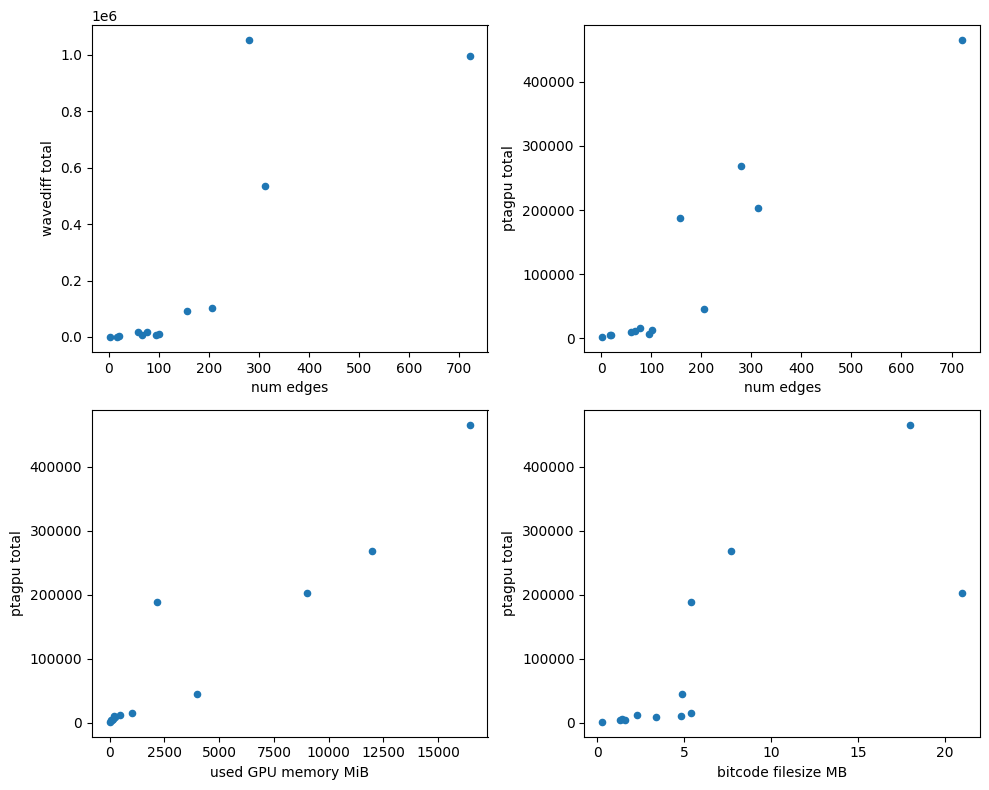

In [3]:
# df.plot.scatter(x='filesize', y=df.columns[0])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
plt.gcf().set_dpi(100)
df.plot.scatter(ax=axes[0,0], x='num edges', y='wavediff total')
df.plot.scatter(ax=axes[0,1], x='num edges', y='ptagpu total')
df.plot.scatter(ax=axes[1,0], x='used GPU memory MiB', y='ptagpu total')
df.plot.scatter(ax=axes[1,1], x='bitcode filesize MB', y='ptagpu total')
fig.tight_layout()

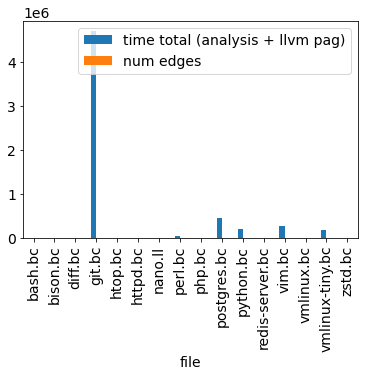

In [ ]:
df[[df.columns[0],df.columns[-3]]].plot.bar()

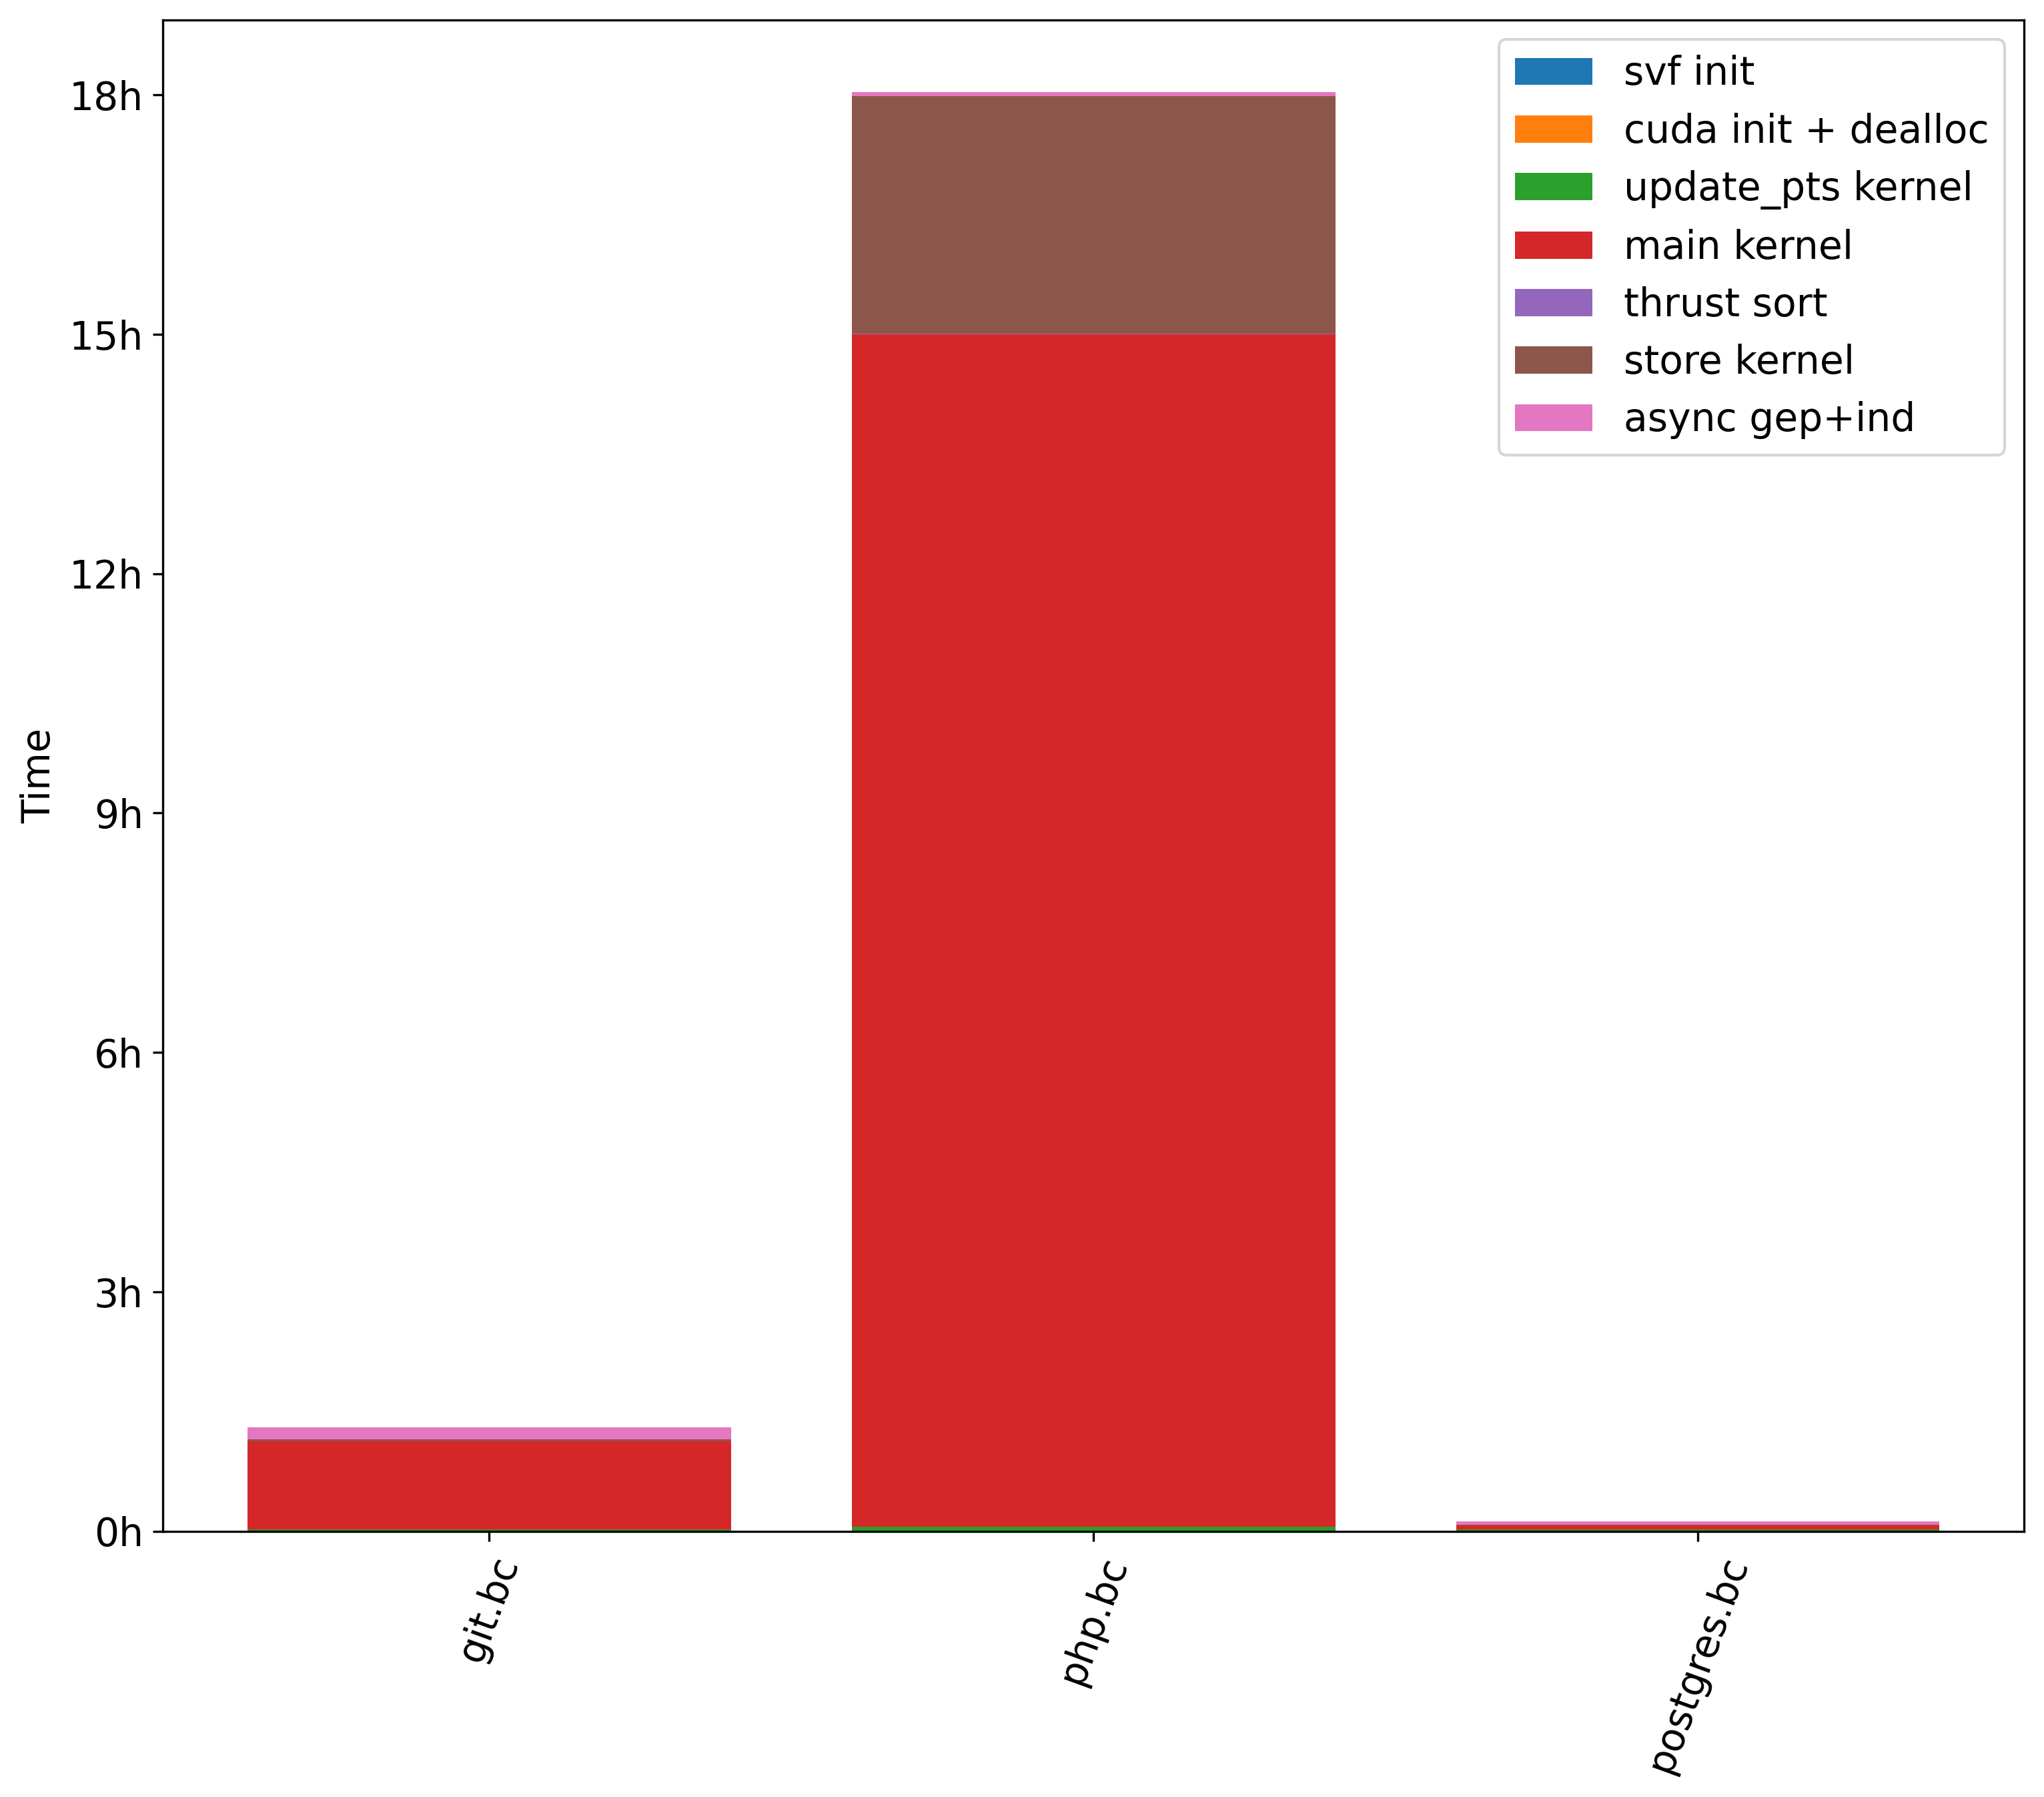

In [25]:
plt.rc('font', size=14)
cumval=0
fig = plt.figure(figsize=(12,10))
plt.gcf().set_dpi(300)
for col in df[df.columns[2:9]]:
    plt.bar(df.index, df[col], bottom=cumval, label=col)
    cumval = cumval+df[col]

_ = plt.xticks(rotation=70)
_ = plt.legend(fontsize=14)
_ = plt.ylabel('Time')
# _ = plt.yticks([120000, 240000, 360000], ["2min", "4min", "6min"])

_ = plt.yticks([3600000*i for i in range(0, 20, 3)], [f"{i}h" for i in range(0, 20, 3)])